#### Matplotlib Assignment

Study Observations:

1. Over the course of the study, the drug Capomulin had the lowest expression in:
    A) Tumor volume, 
    B) and number of metastatic sites.  
   Furthermore, the rate of survival for mice tested with Capomulin was higher than for those tested with other drugs. Fewer      than five mice were deceased after treatment. Tumor volume was also shown to decrease with treatmests of Capomulin. 
2. Other drugs in the study were shown to be only slightly more affective than placebos in decreasing tumor volume and mitigating metastatic sites. 

Import Dependencies

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats 
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [3]:
clinical_data = pd.read_csv('clinicaltrial_data.csv')
mouse_data = pd.read_csv('mousedrug_data.csv')

In [4]:
clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


#### Merge The Two Data Sets into Clincal Trial Dataframe (ct_df)

In [6]:
ct_df = pd.merge(clinical_data, mouse_data, how='outer', on='Mouse ID')
ct_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


#### Create Timepoint v Tumor Volume (mm3)

In [7]:
ct_group = ct_df.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)']
ct_group_err = ct_df.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)']
ct_group_df = pd.DataFrame(ct_group)
ct_group_df = ct_group_df.reset_index()
ct_group_df.head()
x_axis = ct_group_df['Timepoint']
y_axis = ct_group_df['Tumor Volume (mm3)']

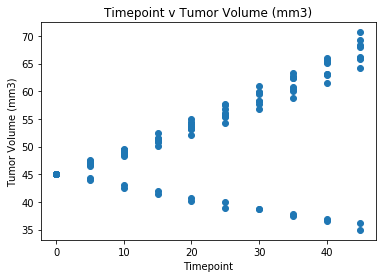

In [8]:
plt.scatter(x_axis,y_axis)
plt.title('Timepoint v Tumor Volume (mm3)')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.show()

In [9]:
tumor_volume_error_pivot = ct_group_df.pivot(index = "Timepoint", columns = "Drug")["Tumor Volume (mm3)"]
tumor_volume_pivot = ct_group_df.pivot(index = "Timepoint", columns = "Drug")["Tumor Volume (mm3)"]
tumor_volume_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


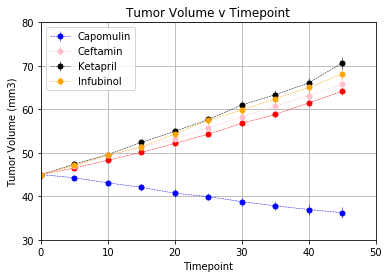

In [50]:
Capomulin = plt.errorbar(tumor_volume_pivot.index, tumor_volume_pivot["Capomulin"], yerr = ct_group_err["Capomulin"], color="blue", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
Ceftamin = plt.errorbar(tumor_volume_pivot.index, tumor_volume_pivot["Ceftamin"], yerr = ct_group_err["Ceftamin"], color="red", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
Ketapril = plt.errorbar(tumor_volume_pivot.index, tumor_volume_pivot["Ketapril"], yerr = ct_group_err["Ketapril"], color="black", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
Infubinol = plt.errorbar(tumor_volume_pivot.index, tumor_volume_pivot["Infubinol"], yerr = ct_group_err["Infubinol"], color="pink", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
Placebo = plt.errorbar(tumor_volume_pivot.index, tumor_volume_pivot["Placebo"], yerr = ct_group_err["Placebo"], color="orange", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.legend(handles = [Capomulin, Infubinol, Ketapril, Placebo], labels = ["Capomulin", "Ceftamin","Ketapril","Infubinol", "Placebo"], loc = "best")
plt.title('Tumor Volume v Timepoint')
plt.ylim(30,80)
plt.xlim(0,50)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()

###### Metastatic Sites

In [51]:
meta_group = ct_df.groupby(['Drug','Timepoint']).mean()['Metastatic Sites']
meta_err_group = ct_df.groupby(['Drug','Timepoint']).sem()['Metastatic Sites']
meta_group_df = pd.DataFrame(meta_group)
meta_err_group_df = pd.DataFrame(meta_err_group)
meta_group_df = meta_group_df.reset_index()
meta_err_group_df = meta_err_group_df.reset_index()
meta_group_pivot = meta_group_df.pivot(index="Timepoint", columns = "Drug")["Metastatic Sites"]
meta_group_error_pivot = meta_err_group_df.pivot(index="Timepoint", columns = "Drug")['Metastatic Sites']
meta_group_pivot.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


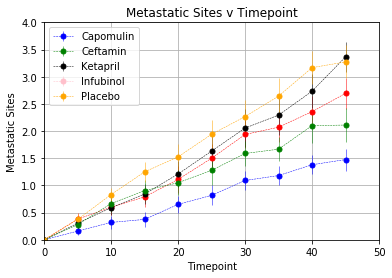

In [54]:
Capomulin = plt.errorbar(meta_group_pivot.index, meta_group_pivot["Capomulin"], yerr = meta_group_error_pivot["Capomulin"], color="blue", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
Ceftamin = plt.errorbar(meta_group_pivot.index, meta_group_pivot["Ceftamin"], yerr = meta_group_error_pivot["Ceftamin"], color="red", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
Ketapril = plt.errorbar(meta_group_pivot.index, meta_group_pivot["Ketapril"], yerr = meta_group_error_pivot["Ketapril"], color="black", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
Infubinol = plt.errorbar(meta_group_pivot.index, meta_group_pivot["Infubinol"], yerr = meta_group_error_pivot["Infubinol"], color="green", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
Placebo = plt.errorbar(meta_group_pivot.index, meta_group_pivot["Placebo"], yerr = meta_group_error_pivot["Placebo"], color="orange", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.legend(handles = [Capomulin, Infubinol, Ketapril, Propriva, Placebo], labels = ["Capomulin", "Ceftamin","Ketapril","Infubinol","Placebo"], loc = "best")
plt.title('Metastatic Sites v Timepoint')
plt.ylim(0,4)
plt.xlim(0,50)
plt.xlabel('Timepoint')
plt.ylabel('Metastatic Sites')
plt.grid()

#### Number of Mice Alive Through Treatment

In [57]:
ct_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [59]:
mouse_group = ct_df.groupby(['Drug','Timepoint']).count()['Mouse ID']
mouse_group_df = pd.DataFrame(mouse_group)
mouse_group_df = mouse_group_df.reset_index()
mouse_group_pivot = mouse_group_df.pivot(index="Timepoint", columns = "Drug")["Mouse ID"]
mouse_group_pivot.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


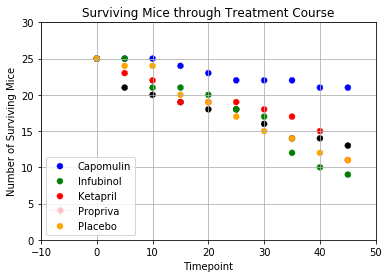

In [130]:
Capomulin = plt.scatter(mouse_group_pivot.index, mouse_group_pivot["Capomulin"], color="blue", marker="o", linestyle="dashed", linewidth=0.50)
Ceftamin = plt.scatter(mouse_group_pivot.index, mouse_group_pivot["Ceftamin"], color="black", marker="o", linestyle="dashed", linewidth=0.50)
Ketapril = plt.scatter(mouse_group_pivot.index, mouse_group_pivot["Ketapril"], color="red", marker="o", linestyle="dashed", linewidth=0.50)
Infubinol = plt.scatter(mouse_group_pivot.index, mouse_group_pivot["Infubinol"], color="green", marker="o", linestyle="dashed", linewidth=0.50)
Placebo = plt.scatter(mouse_group_pivot.index, mouse_group_pivot["Placebo"], color="orange", marker="o", linestyle="dashed", linewidth=0.50)
plt.legend(handles = [Capomulin, Infubinol, Ketapril, Propriva, Placebo], labels = ["Capomulin", "Infubinol","Ketapril","Propriva","Placebo"], loc = "best")
plt.title('Surviving Mice through Treatment Course')
plt.ylim(0,30)
plt.xlim(-10,50)
plt.xlabel('Timepoint')
plt.ylabel('Number of Surviving Mice')
plt.grid()

#### Total Percent Tumor Volume Change

In [81]:
tum_vol = tumor_volume_pivot
tum_vol = tum_vol.reset_index()
tum_vol

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


In [125]:
capomulin_change=(tum_vol["Capomulin"].iloc[9]-tum_vol["Capomulin"].iloc[0])/tum_vol["Capomulin"].iloc[0]*100
infubinol_change=(tum_vol["Infubinol"].iloc[9]-tum_vol["Infubinol"].iloc[0])/tum_vol["Infubinol"].iloc[0]*100
ketapril_change=(tum_vol["Ketapril"].iloc[9]-tum_vol["Ketapril"].iloc[0])/tum_vol["Ketapril"].iloc[0]*100
propriva_change=(tum_vol["Propriva"].iloc[9]-tum_vol["Propriva"].iloc[0])/tum_vol["Propriva"].iloc[0]*100
ceftamin_change=(tum_vol["Ceftamin"].iloc[9]-tum_vol["Ceftamin"].iloc[0])/tum_vol["Ceftamin"].iloc[0]*100
placebo_change=(tum_vol["Placebo"].iloc[9]-tum_vol["Placebo"].iloc[0])/tum_vol["Placebo"].iloc[0]*100

tum_change = ({'Capomulin': [capomulin_change], 
                 'Infubinol': [infubinol_change], 
                 'Ketapril': [ketapril_change], 
                 'Propriva': [propriva_change],
                 'Placebo': [placebo_change]})
tum_change_df = pd.DataFrame(tum_change)
tum_change_df

,Capomulin,Infubinol,Ketapril,Propriva,Placebo
0,-19.475303,46.123472,57.028795,47.241175,51.29796


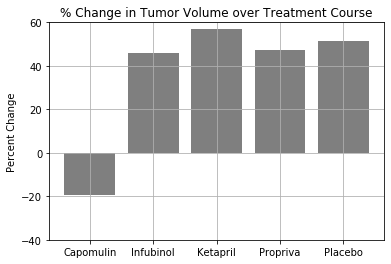

In [131]:
x_axis = np.arange(0, len(drugs))
plt.bar(x_axis, tum_change_df.loc[0], color="black", alpha=0.5)
plt.title("% Change in Tumor Volume over Treatment Course")
plt.ylabel("Percent Change")
plt.ylim(-40,60)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Propriva", "Placebo"])
plt.grid()
plt.show()